<a href="https://colab.research.google.com/github/windopper/NerualNetworkPracticeInJupyter/blob/main/timeseriesbasic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

reference 
<a>https://codetorial.net/tensorflow/time_series_forecasting/time_series_data.html

시계열 데이터.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

plt.style.use('default')
plt.rcParams['figure.figsize'] = (6, 3)
plt.rcParams['font.size'] = 12

def plot_series(time, series, format="-", start=0, end=None, label=None):
  plt.plot(time[start:end], series[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Value")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

trend() 함수는 경향성을 갖는 시계열 데이터 반환

slope 값에 따라서 양의 경향성 음의 경향을 가질 수 있음

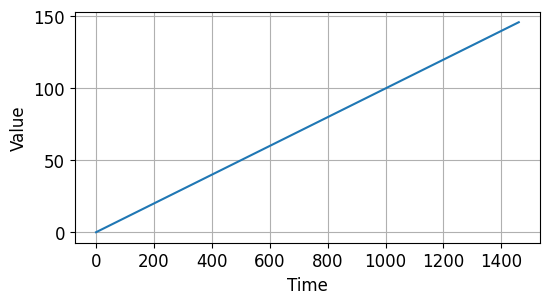

In [3]:
def trend(time, slope=0):
  return slope * time

time = np.arange(4 * 365 + 1)
series = trend(time, slope=0.1)

plot_series(time, series)
plt.show()

계절성을 갖는 시계열 데이터

주어진 주기 period 에 대해 특정 값을 반복하는 시계열 데이터

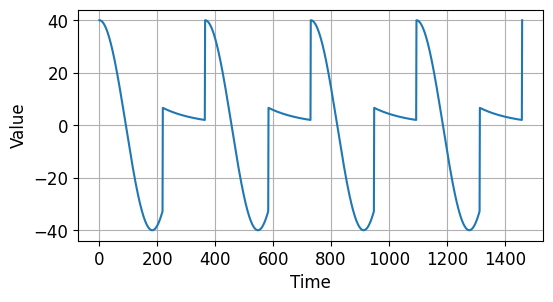

In [4]:
def seasonal_pattern(season_time):
  return np.where(season_time<0.6,
                  np.cos(season_time * 2 * np.pi),
                  1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
  season_time = ((time + phase) % period) / period
  return amplitude * seasonal_pattern(season_time)

amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)

plot_series(time, series)
plt.show()

trend()와 seasonality() 함수를 사용하여 경향성과 계절성을 모두 갖는 시계열 데이터를 만듬 

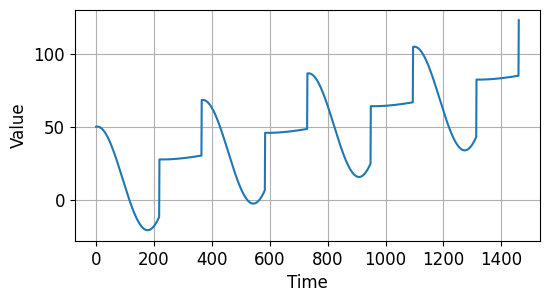

In [5]:
baseline = 10
slope = 0.05
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

plot_series(time, series)
plt.show()

white_noise() 함수는 0에서 noise_level 값 사이의 임의의 실수를 갖는 시계열 데이터를 반환

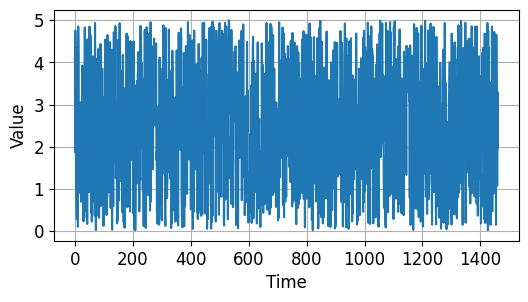

In [7]:
def white_noise(time, noise_level=1, seed=None):
  rnd = np.random.RandomState(seed)
  return rnd.rand(len(time)) * noise_level

noise_level=5
noise = white_noise(time, noise_level, seed=42)

plot_series(time, noise)
plt.show()

trend, seasonality, noise를 모두 갖는 시계절 데이터

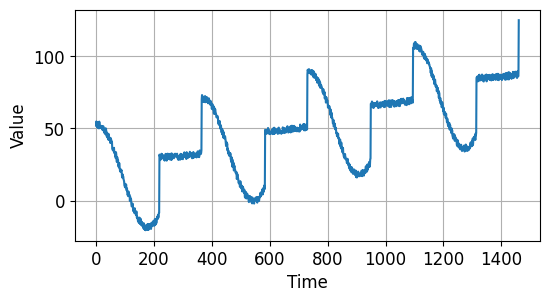

In [11]:
baseline = 10
slope = 0.05
noise_level = 5
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude = amplitude) + white_noise(time, noise_level, seed=42)

plot_series(time, series)
plt.show()

autocorrelation() 함수는 자기상관성을 갖는 시계열 데이터 반환

np.random.RandomState.randn는 평균이 0 , 표준편차가 1의 표준정규분포 난수 생성

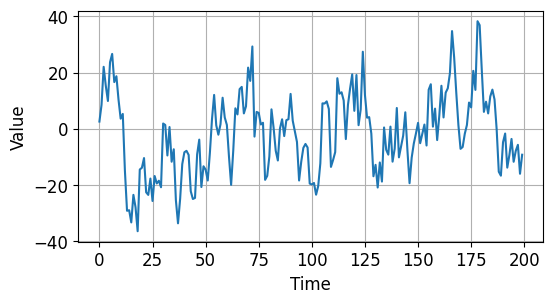

In [15]:
split_time = 1000
time_train, x_train = time[:split_time], series[:split_time]
time_valid, x_valid = time[split_time:], series[split_time:]

def autocorrelation(time, amplitude, seed=None):
  rnd = np.random.RandomState(seed)
  pi = 0.8
  ar = rnd.randn(len(time)+1)
  for step in range(1, len(time) + 1):
    ar[step] += pi * ar[step -1]
  return ar[1:] * amplitude

series = autocorrelation(time, 10, seed=42)
plot_series(time[:200], series[:200])
plt.show()

자기 상관성과 경향성을 갖는 시계열 데이터

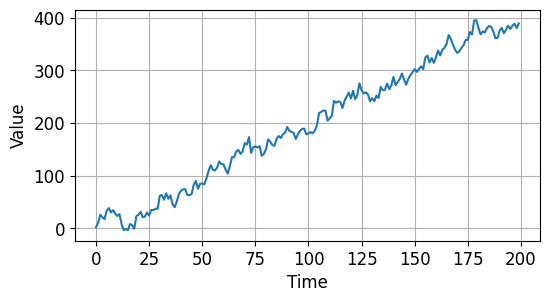

In [16]:
series = autocorrelation(time, 10, seed=42) + trend(time, 2)
plot_series(time[:200], series[:200])
plt.show()

자기상관성, 경향성, 계절성을 갖는 시계열 데이터

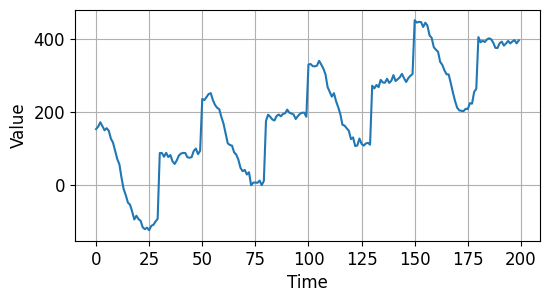

In [18]:
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
plot_series(time[:200], series[:200])
plt.show()

특정 시점 이후로 다른 특성을 갖는 시계열 데이터

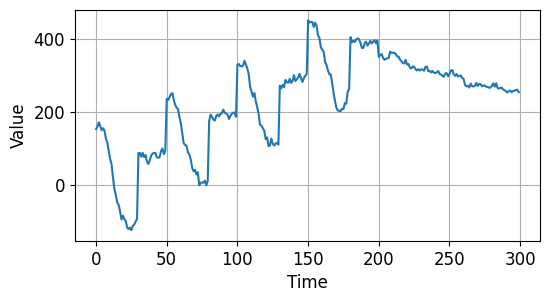

In [20]:
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
series2 = autocorrelation(time, 5 , seed=42) + seasonality(time, period=50, amplitude = 2) + trend(time, -1) + 550

series[200:] = series2[200:]
plot_series(time[:300], series[:300])
plt.show()